In [1]:
# import libraries with conventional aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 4.1: Predicting Election Outcomes {-}

### Section 4.1.1: Loops in Python {-}

In [2]:
values = np.array([2, 4, 6])
n = len(values) # number of elements in values
results = np.zeros(n) # empty container vector for storing the results 

# loop counter `i` will take on values 0, 1, ..., n in that order
for i in range(n):
    # store multiplication results as the ith element of `results` vector
    results[i] = values[i] * 2
    print(f"{values[i]} times 2 is equal to {results[i]}")

results

2 times 2 is equal to 4.0
4 times 2 is equal to 8.0
6 times 2 is equal to 12.0


array([ 4.,  8., 12.])

In [3]:
# check if the code runs when i = 0 
# i = 0 represents the first element in 'values'
i = 0
x = values[i] * 2
print(f"{values[i]} times 2 is equal to {x}")

2 times 2 is equal to 4


### Section 4.1.2: General Conditional Statements in Python {-}

In [4]:
# define the operation to be executed
operation = 'add'

if operation=='add':
    print('I will perform addition 4 + 4')
    print(4 + 4)

if operation=='multiply':
    print('I will perform multiplication 4 * 4')
    print(4 * 4)

I will perform addition 4 + 4
8


In [5]:
# Note that 'operation' is redefined
operation = 'multiply'

if operation=='add':
    print('I will perform addition 4 + 4')
    print(4 + 4)
else:
    print('I will perform multiplication 4 * 4')
    print(4 * 4)

I will perform multiplication 4 * 4
16


In [6]:
# Note that 'operation' is redefined
operation = 'subtract'

if operation=='add':
    print('I will perform addition 4 + 4')
    print(4 + 4)
elif operation=='multiply':
    print('I will perform multiplication 4 * 4')
    print(4 * 4)
else:
    print(f"'{operation}' is invalid. Use either 'add' or 'multiply'.")

'subtract' is invalid. Use either 'add' or 'multiply'.


In [7]:
values = np.arange(1,6)
n = len(values)
results = np.zeros(n)

for i in range(n):
    # x and r get overwritten in each iteration
    x = values[i]
    r = x % 2 # remainder of x divided by 2 to check if x is even or odd
    if r==0: # remainder is 0
        print(f"{x} is even and I will perform addition {x} + {x}")
        results[i] = x + x
    else: # remainder is not 0
        print(f"{x} is odd and I will perform multiplication {x} * {x}")
        results[i] = x * x

results

1 is odd and I will perform multiplication 1 * 1
2 is even and I will perform addition 2 + 2
3 is odd and I will perform multiplication 3 * 3
4 is even and I will perform addition 4 + 4
5 is odd and I will perform multiplication 5 * 5


array([ 1.,  4.,  9.,  8., 25.])

### Section 4.1.3: Poll Predictions {-}

In [8]:
# import the datetime module
from datetime import datetime

# load election results, by state
pres08 = pd.read_csv('pres08.csv')

# load polling data
polls08 = pd.read_csv('polls08.csv')

# compute Obama's margin
polls08['margin'] = polls08['Obama'] - polls08['McCain']
pres08['margin'] = pres08['Obama'] - pres08['McCain']

x = datetime.strptime('2008-11-04', '%Y-%m-%d')
y = datetime.strptime('2008/9/1', '%Y/%m/%d')

# number of days between 9/1/2008 and 11/4/2008
x-y # a timedelta object

datetime.timedelta(days=64)

In [9]:
# number of days as an integer
(x-y).days 

64

In [10]:
# convert middate to datetime object using pandas convenience function
polls08['middate'] = pd.to_datetime(polls08['middate'])

# compute the number of days to the election; use x defined above
# extract days using the .dt accessor
polls08['days_to_election'] = (x - polls08['middate']).dt.days

# extract unique state names which the loop will iterate through
st_names = polls08['state'].unique()

# initialize a container vector for storing the results as a series
poll_pred = pd.Series(index=st_names)

poll_pred.head()

AL   NaN
AK   NaN
AZ   NaN
AR   NaN
CA   NaN
dtype: float64

In [11]:
# loop across the 50 states plus DC
for i in range(len(st_names)):
    # subset the ith state
    state_data = polls08[polls08['state']==st_names[i]]
    # further subset the latest polls within the state
    latest = (state_data[state_data['days_to_election']==
                         state_data['days_to_election'].min()])
    # compute the mean of the latest polls and store it
    poll_pred[i] = latest['margin'].mean()

poll_pred.head(10)

AL   -25.0
AK   -19.0
AZ    -2.5
AR    -7.0
CA    24.0
CO     7.0
CT    25.0
DC    69.0
DE    30.0
FL     2.0
dtype: float64

Because we stored the state identifier as the index, we could use states as the loop counter. In complex numeric indexing cases, looping through names can be a good alternative. 

In [12]:
poll_pred_alt = pd.Series(index=st_names)

# loop across the 50 states plus DC
for state in st_names:
    # subset the polls data for the current state
    state_data = polls08[polls08['state']==state]
    # subset the latest poll for the current state
    latest = (state_data[state_data['days_to_election']==
                         state_data['days_to_election'].min()])
    # compute the mean of the latest poll and store it in the results vector
    poll_pred_alt[state] = latest['margin'].mean()

# check that results are the same
poll_pred.equals(poll_pred_alt)

True

Recall from chapter 3 that if we want to perform element-wise arithmetic on two equal length vectors whose elements are sorted correctly, the indexes should be identical. Since the `poll_pred` index is state abbreviations, we can reset the `pres08` index to state abbreviations and then extract the margin column without modifying the data frame in place. Of course, we could also add `poll_pred` to the data frame, which we will illustrate later. 

In [13]:
# errors of latest polls
errors = pres08.set_index('state')['margin'] - poll_pred

errors.head()

state
AL     4.0
AK    -2.0
AZ    -6.5
AR   -13.0
CA     0.0
dtype: float64

In [14]:
# mean prediction error
errors.mean()

1.0620915032679739

In [15]:
# root mean squared prediction error
np.sqrt((errors**2).mean())

5.908940458495747

Text(-8.5, 0.075, 'average error')

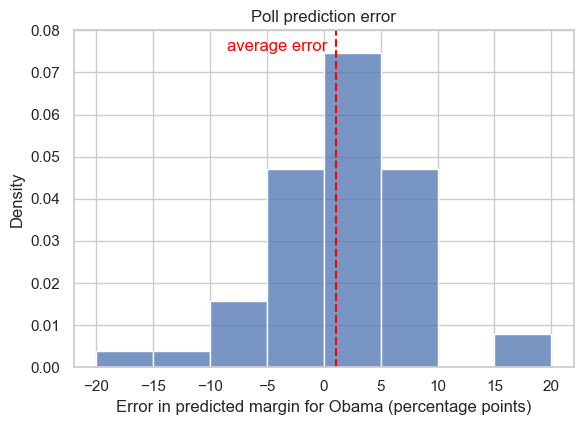

In [16]:
# histogram of errors
sns.set_theme(style="whitegrid")

sns.displot(
    x=errors, stat='density', binrange=(-20, 20), binwidth=5, 
    height=4, aspect=1.5, 
).set(xlabel='Error in predicted margin for Obama (percentage points)', 
      title='Poll prediction error',
      ylim=(0, 0.08)).despine(right=False, top=False)

# add a vertical line representing the mean
plt.axvline(x=errors.mean(), color='red', linestyle='--')

# add a text label for the median
plt.text(x=-8.5, y=0.075, s='average error', color='red')

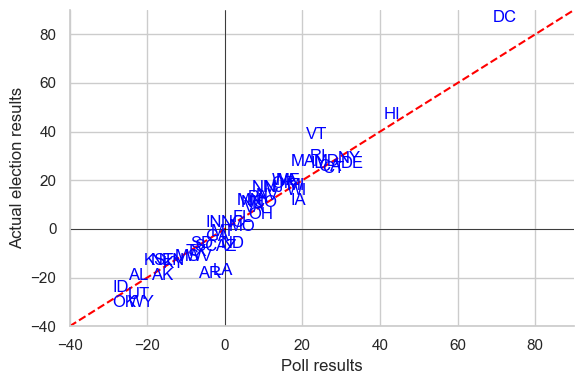

In [17]:
# add poll_pred to pres08 for easier plotting and analysis 
# reset the index to match the index of pres08 and drop the old index
pres08['poll_pred'] = poll_pred.reset_index(drop=True)

# marker='' generates an "empty" plot
sns.relplot(
    data=pres08, x='poll_pred', y='margin', marker='',
    height=4, aspect=1.5,
).set(xlabel='Poll results', ylabel='Actual election results',
      ylim=(-40, 90), xlim=(-40, 90))

# add state abbreviations
for i in range(len(pres08['state'])):
    plt.text(x=pres08['poll_pred'][i], y=pres08['margin'][i], 
             s=pres08['state'][i], color='blue')
    
# add 45 degree line
plt.gca().axline((0, 0), slope=1, color='red', linestyle='--')

# add vertical and horizontal lines at 0
plt.axvline(x=0, color='black', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)

In [18]:
# which state polls called the election wrong?
pres08['state'][np.sign(pres08['poll_pred']) != np.sign(pres08['margin'])]

14    IN
25    MO
33    NC
Name: state, dtype: object

In [19]:
# what was the actual margin for these states?
pres08['margin'][np.sign(pres08['poll_pred']) != np.sign(pres08['margin'])]

14    1
25   -1
33    1
Name: margin, dtype: int64

In [20]:
# actual results: total number of electoral votes won by Obama
pres08['EV'][pres08['margin']>0].sum()

364

In [21]:
# poll prediction
pres08['EV'][pres08['poll_pred']>0].sum()

349

In [22]:
# load the data
pollsUS08 = pd.read_csv('pollsUS08.csv')

# compute number of days to the election as before 
pollsUS08['middate'] = pd.to_datetime(pollsUS08['middate'])

pollsUS08['days_to_election'] = (x - pollsUS08['middate']).dt.days

# empty numpy vectors to store predictions for Obama and McCain
Obama_pred = np.zeros(90)
McCain_pred = np.zeros(90)

With zero-based indexing, the days sequence 1-90 does not match the vector index 0-89. We need to account for this somewhere. One option, among many, is to add 1 to the loop counter when working with the days sequence.

In [23]:
for i in range(len(Obama_pred)):
    # take all polls conducted within the past 7 days
    week_data = (pollsUS08[(pollsUS08['days_to_election'] <= (90 - (i + 1) + 7)) 
                           & (pollsUS08['days_to_election'] > (90 - (i + 1)))]) 
    # compute the mean of the polls for Obama and McCain
    Obama_pred[i] = week_data['Obama'].mean()
    McCain_pred[i] = week_data['McCain'].mean()

# put together a data frame for plotting
pollsUS08_avg = pd.DataFrame({'Obama': Obama_pred, 
                              'McCain': McCain_pred,
                              'days_to_election': np.arange(90, 0, -1)})

pollsUS08_avg.head()

,Obama,McCain,days_to_election
0,44.538462,40.692308,90
1,45.000000,40.692308,89
2,45.230769,40.846154,88
3,45.750000,42.000000,87
4,45.888889,42.000000,86


Recall from chapter 3 that plotting groups in seaborn works best when the grouping variable is stored in its own column. In this case, the grouping variable is the candidate. To pivot the candidates into a single column, we need to reshape the data into a longer format, which can be accomplished with the `melt()` method in pandas. 

In [24]:
# reshape the data: pivot longer using melt
pollsUS08_avg_long = pollsUS08_avg.melt(id_vars='days_to_election', 
                                        var_name='Candidate', 
                                        value_name='poll_avg')

pollsUS08_avg_long.head()

,days_to_election,Candidate,poll_avg
0,90,Obama,44.538462
1,89,Obama,45.000000
2,88,Obama,45.230769
3,87,Obama,45.750000
4,86,Obama,45.888889


In [25]:
pollsUS08_avg_long.tail()

,days_to_election,Candidate,poll_avg
175,5,McCain,43.384615
176,4,McCain,43.708333
177,3,McCain,44.000000
178,2,McCain,44.185185
179,1,McCain,44.160000


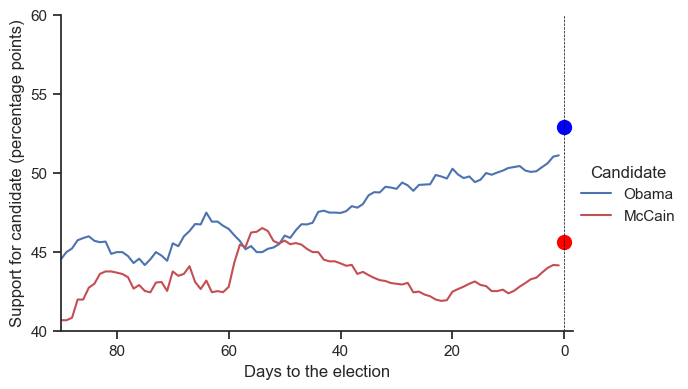

In [26]:
sns.set_theme(style="ticks")

# plot going from 90 days to 1 day before the election
sns.relplot(
    data=pollsUS08_avg_long, x='days_to_election', y='poll_avg', 
    hue='Candidate', kind='line', 
    palette=['b', 'r'], height=4, aspect=1.5
).set(ylim=(40, 60), yticks=range(40, 61, 5), 
      xlim=(90, -1.5), # small buffer in right limit for aesthetics
      xlabel='Days to the election', 
      ylabel='Support for candidate (percentage points)')

# line indicating election day
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

# actual election results 
plt.scatter(0, 52.93, color='blue', s=100)
plt.scatter(0, 45.65, color='red', s=100)

## Section 4.2: Linear Regression {-}

### Section 4.2.1: Facial Appearance and Election Outcomes {-}

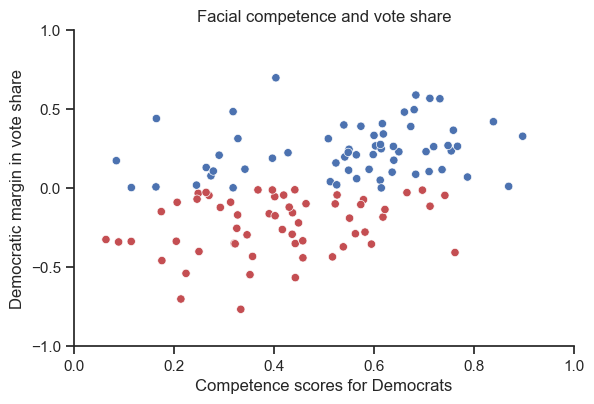

In [27]:
# load the data
face = pd.read_csv('face.csv')

# two-party vote share for Democrats and Republicans
face['d_share'] = face['d.votes'] / (face['d.votes'] + face['r.votes'])
face['r_share'] = face['r.votes'] / (face['d.votes'] + face['r.votes'])
face['diff_share'] = face['d_share'] - face['r_share']

sns.relplot(
    data=face, x='d.comp', y='diff_share', 
    hue='w.party', palette=['b','r'], legend=False, height=4, aspect=1.5
).set(xlim=(0, 1), ylim=(-1, 1), yticks=np.arange(-1.0, 1.5, 0.5),
      title='Facial competence and vote share',
      xlabel='Competence scores for Democrats',
      ylabel='Democratic margin in vote share')

### Section 4.2.2: Correlation and Scatter Plots {-}

In [28]:
face['d.comp'].corr(face['diff_share'])

0.43277434572761064

### Section 4.2.3: Least Squares {-}

In [29]:
# import the statsmodels formula API
import statsmodels.formula.api as smf

`statsmodels` works best when column names do not contain spaces or special characters, such as dots. The chapter appendix provides a more in-depth discussion about why this is the case and how to use the module if you want to retain special characters or spaces in variable names. For now, though, we will replace the dots in the column names with underscores to prevent any errors. 

In [30]:
# replace dots in column names with underscores
face.columns = face.columns.str.replace('.', '_')

face.columns

Index(['year', 'state', 'winner', 'loser', 'w_party', 'l_party', 'd_comp',
       'r_comp', 'd_votes', 'r_votes', 'd_share', 'r_share', 'diff_share'],
      dtype='object')

In [31]:
# fit the model; the statsmodels formula API uses R-style formulas
fit = smf.ols('diff_share ~ d_comp', data=face).fit()

fit.model.formula

'diff_share ~ d_comp'

In [32]:
# get the estimated coefficients
fit.params

Intercept   -0.312226
d_comp       0.660381
dtype: float64

In [33]:
# get fitted or predicted values
fit.fittedvalues.head(n=10)

0    0.060604
1   -0.086433
2    0.092171
3    0.045392
4    0.136987
5   -0.100572
6   -0.045593
7    0.085994
8    0.043438
9    0.261788
dtype: float64

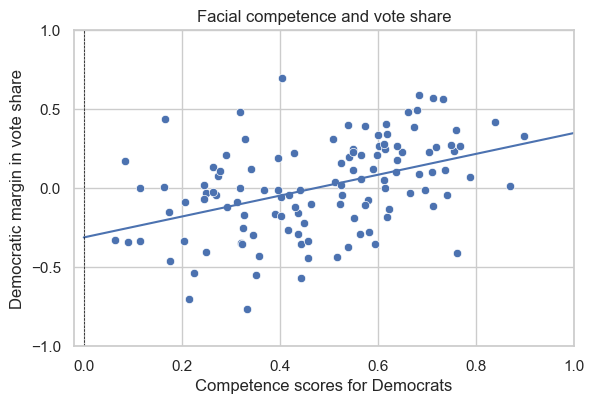

In [34]:
# store the intercept and slope for plotting a regression line
intercept, slope = fit.params

# create a vector for the x-axis limits
x_values = np.array([0,1])

# using the slope and intercept, predict y values for the x axis limits
y_values = intercept + slope * x_values

sns.set_theme(style="whitegrid")

# plot a scatterplot and overlay a regression line
sns.relplot(
    data=face, x='d_comp', y='diff_share', height=4, aspect=1.5
).set(ylim=(-1, 1), yticks=np.arange(-1.0, 1.5, 0.5),
      xlim=(-0.02, 1), # small buffer in left limit for aesthetics
      title='Facial competence and vote share',
      xlabel='Competence scores for Democrats',
      ylabel='Democratic margin in vote share').despine(right=False, top=False)

plt.plot(x_values, y_values) # regression line

plt.axvline(x=0, color='black', linewidth=0.5, linestyle='--')

*Note that seaborn has a built-in function for plotting regression lines, which we will use later, but it is not as easy to show the regression line's intercept.*

In [35]:
epsilon_hat = fit.resid # residuals
np.sqrt((epsilon_hat**2).mean()) # RMSE

0.2642360764039512

### Section 4.2.4: Regression Towards the Mean {-}

### Section 4.2.5: Merging Datasets in Pandas {-}

In [36]:
# load the 2012 data
pres12 = pd.read_csv('pres12.csv')

# remove poll_pred from pres08
pres08.drop('poll_pred', axis=1, inplace=True)

# quick look at the two data sets
pres08.head()

,state.name,state,Obama,McCain,EV,margin
0,Alabama,AL,39,60,9,-21
1,Alaska,AK,38,59,3,-21
2,Arizona,AZ,45,54,10,-9
3,Arkansas,AR,39,59,6,-20
4,California,CA,61,37,55,24


In [37]:
pres12.head()

,state,Obama,Romney,EV
0,AL,38,61,9
1,AK,41,55,3
2,AZ,45,54,11
3,AR,37,61,6
4,CA,60,37,55


In [38]:
# merge two data frames
pres = pd.merge(pres08, pres12, on='state')

pres.head()

,state.name,state,Obama_x,McCain,EV_x,margin,Obama_y,Romney,EV_y
0,Alabama,AL,39,60,9,-21,38,61,9
1,Alaska,AK,38,59,3,-21,41,55,3
2,Arizona,AZ,45,54,10,-9,45,54,11
3,Arkansas,AR,39,59,6,-20,37,61,6
4,California,CA,61,37,55,24,60,37,55


In [39]:
pres.describe().round(2)

,Obama_x,McCain,EV_x,margin,Obama_y,Romney,EV_y
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,51.37,47.06,10.55,4.31,49.06,49.04,10.55
std,11.04,11.04,9.58,22.07,11.80,11.79,9.69
min,33.00,7.00,3.00,-32.00,25.00,7.00,3.00
25%,43.00,40.00,4.50,-13.00,40.50,41.00,4.50
50%,51.00,47.00,8.00,4.00,51.00,48.00,8.00
75%,57.50,56.00,11.50,17.50,56.00,58.00,11.50
max,92.00,66.00,55.00,85.00,91.00,73.00,55.00


In [40]:
# change the variable name for illustration
pres12.rename(columns={'state': 'state_abb'}, inplace=True)

pres12.head()

,state_abb,Obama,Romney,EV
0,AL,38,61,9
1,AK,41,55,3
2,AZ,45,54,11
3,AR,37,61,6
4,CA,60,37,55


In [41]:
# merging data sets using variable keys with different names
pres = (pd.merge(pres08, pres12, left_on='state', right_on='state_abb').
        drop('state_abb', axis=1))

pres.head()

,state.name,state,Obama_x,McCain,EV_x,margin,Obama_y,Romney,EV_y
0,Alabama,AL,39,60,9,-21,38,61,9
1,Alaska,AK,38,59,3,-21,41,55,3
2,Arizona,AZ,45,54,10,-9,45,54,11
3,Arkansas,AR,39,59,6,-20,37,61,6
4,California,CA,61,37,55,24,60,37,55


In [42]:
pres.describe().round(2)

,Obama_x,McCain,EV_x,margin,Obama_y,Romney,EV_y
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,51.37,47.06,10.55,4.31,49.06,49.04,10.55
std,11.04,11.04,9.58,22.07,11.80,11.79,9.69
min,33.00,7.00,3.00,-32.00,25.00,7.00,3.00
25%,43.00,40.00,4.50,-13.00,40.50,41.00,4.50
50%,51.00,47.00,8.00,4.00,51.00,48.00,8.00
75%,57.50,56.00,11.50,17.50,56.00,58.00,11.50
max,92.00,66.00,55.00,85.00,91.00,73.00,55.00


In [43]:
# concatenate two data frames
pres1 = pd.concat([pres08, pres12], axis='columns')

pres1.head()

,state.name,state,Obama,McCain,EV,margin,state_abb,Obama,Romney,EV
0,Alabama,AL,39,60,9,-21,AL,38,61,9
1,Alaska,AK,38,59,3,-21,AK,41,55,3
2,Arizona,AZ,45,54,10,-9,AZ,45,54,11
3,Arkansas,AR,39,59,6,-20,AR,37,61,6
4,California,CA,61,37,55,24,CA,60,37,55


In [44]:
'''
DC and DE are flipped in this alternative approach, and we have overlapping 
column names.  
'''
pres1.iloc[7:9]

,state.name,state,Obama,McCain,EV,margin,state_abb,Obama,Romney,EV
7,D.C.,DC,92,7,3,85,DE,59,40,3
8,Delaware,DE,62,37,3,25,DC,91,7,3


In [45]:
# merge() does not have this problem
pres.iloc[7:9]

,state.name,state,Obama_x,McCain,EV_x,margin,Obama_y,Romney,EV_y
7,D.C.,DC,92,7,3,85,91,7,3
8,Delaware,DE,62,37,3,25,59,40,3


If we move the state identifier to the index, then `concat()` will align the indexes correctly. We still have overlapping column names, though. 

In [46]:
pres2 = pd.concat([pres08.set_index('state'), 
                   pres12.set_index('state_abb')], axis='columns')

pres2.iloc[7:9]

,state.name,Obama,McCain,EV,margin,Obama,Romney,EV
DC,D.C.,92,7,3,85,91,7,3
DE,Delaware,62,37,3,25,59,40,3


Pandas and numpy do not have built-in z-score functions. We can either calculate the z-scores manually, use the zscore function from the scipy module, or build a simple function of our own. In this case, the final option is straightforward.

In [47]:
# define a function to standardize a vector (calculate z-scores)
def standardize(x):
    return (x - x.mean()) / x.std()

pres['Obama2008_z'] = standardize(pres['Obama_x'])
pres['Obama2012_z'] = standardize(pres['Obama_y'])

# estimated intercept is essentially zero   
fit1 = smf.ols('Obama2012_z ~ Obama2008_z', data=pres).fit()
fit1.params

Intercept     -2.914335e-16
Obama2008_z    9.834419e-01
dtype: float64

In [48]:
# regression without an intercept
fit1 = smf.ols('Obama2012_z ~ -1 + Obama2008_z', data=pres).fit()

# estimated slope is identical
fit1.params

Obama2008_z    0.983442
dtype: float64

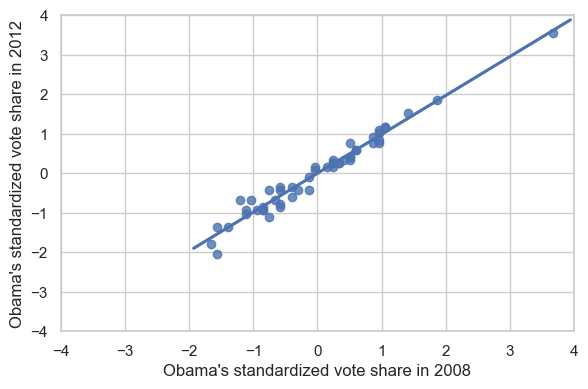

In [49]:
# plot using seaborn's built-in lmplot function
sns.lmplot(
    data=pres, x='Obama2008_z', y='Obama2012_z', ci=None, truncate=False,
    height=4, aspect=1.5,
).set(xlim=(-4, 4), ylim=(-4, 4), 
      xlabel="Obama's standardized vote share in 2008",
      ylabel="Obama's standardized vote share in 2012").despine(
          right=False, top=False) 

*Setting `truncate=False` extends the regression line a bit past the data range, but only up to the axis limits that `lmplot()` sets internally, not to the axis limits we set manually in `.set()`.*

In [50]:
# bottom quartile
((pres['Obama2012_z'] > pres['Obama2008_z'])[
    (pres['Obama2008_z'] <= pres['Obama2008_z'].quantile(0.25))].mean())

0.5714285714285714

In [51]:
# top quartile
((pres['Obama2012_z'] > pres['Obama2008_z'])[
    (pres['Obama2008_z'] >= pres['Obama2008_z'].quantile(0.75))].mean())

0.46153846153846156

### Section 4.2.6: Model Fit {-}

In [52]:
florida = pd.read_csv('florida.csv')

# regress Buchanan's 2000 votes on Perot's 1996 votes
fit2 = smf.ols('Buchanan00 ~ Perot96', data=florida).fit()

fit2.params

Intercept    1.345752
Perot96      0.035915
dtype: float64

In [53]:
# compute TSS (total sum of squares)
TSS2 = ((florida['Buchanan00'] - florida['Buchanan00'].mean())**2).sum()

# compute SSR (sum of squared residuals)
SSR2 = (fit2.resid**2).sum()

# Coefficient of determination (R-squared)
(TSS2 - SSR2) / TSS2

0.513033325505709

In [54]:
def R2(fit):
    resid = fit.resid # residuals
    y = fit.fittedvalues + resid # outcome variable
    TSS = ((y - y.mean())**2).sum()
    SSR = (resid**2).sum()
    R2 = (TSS - SSR) / TSS
    return R2

R2(fit2)

0.513033325505709

In [55]:
# built-in statsmodels R2 attribute
fit2.rsquared

0.5130333255057089

In [56]:
fit1.rsquared

0.9671579118703088

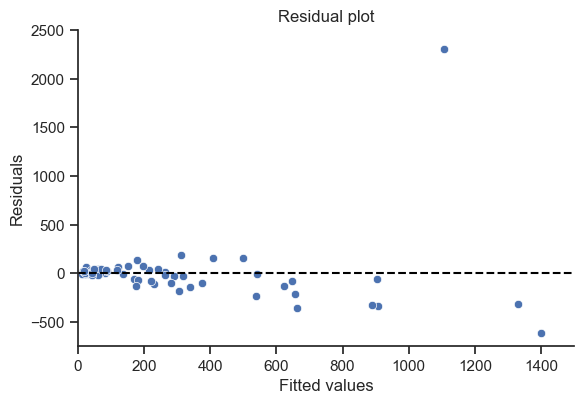

In [57]:
sns.set_theme(style="ticks")

sns.relplot(
    x=fit2.fittedvalues, y=fit2.resid, height=4, aspect=1.5
).set(xlabel='Fitted values', ylabel='Residuals', title='Residual plot',
      xlim=(0,1500), ylim=(-750, 2500))

plt.axhline(y=0, color='black', linestyle='--')

In [58]:
florida['county'][fit2.resid == fit2.resid.max()]

49    PalmBeach
Name: county, dtype: object

In [59]:
# data without palm beach 
florida_pb = florida.loc[florida.county != 'PalmBeach'].copy()

fit3 = smf.ols('Buchanan00 ~ Perot96', data=florida_pb).fit()

fit3.params

Intercept    45.841933
Perot96       0.024352
dtype: float64

In [60]:
R2(fit3)

0.8511674585300796

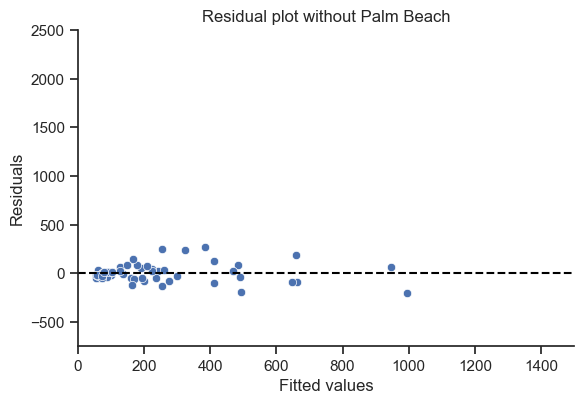

In [61]:
sns.relplot(
    x=fit3.fittedvalues, y=fit3.resid, height=4, aspect=1.5
).set(xlabel='Fitted values', ylabel='Residuals', 
      title='Residual plot without Palm Beach',
      xlim=(0,1500), ylim=(-750, 2500))

plt.axhline(y=0, color='black', linestyle='--')

Text(26500, 330, 'regression without\nPalm Beach')

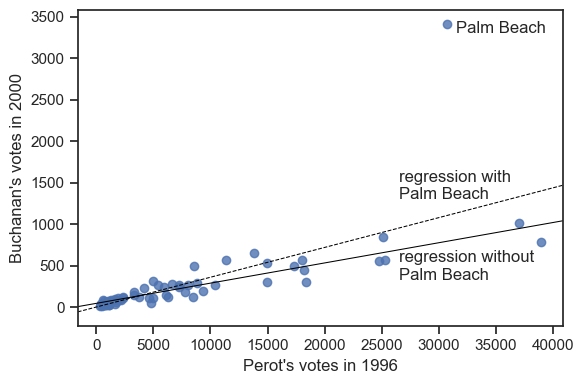

In [62]:
# plot both regression lines on the same scatterplot

# use seaborn's lmplot() to plot the regression line associated with fit2
sns.lmplot(
    data=florida, x='Perot96', y='Buchanan00', ci=None, truncate=False,
    height=4, aspect=1.5, 
    line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 0.75},
).set(xlabel="Perot's votes in 1996", 
      ylabel="Buchanan's votes in 2000").despine(right=False, top=False)

# store the x-axis limits from the plot
x_lim = plt.gca().get_xlim()

# store the limits as a data frame with the same column name as the predictor
# note: we only need two points to plot a linear regression line
x_values = pd.DataFrame({'Perot96': x_lim})

# use the fit3 model and the predict method to generate y values
y_values = fit3.predict(x_values)

# plot the regression line associated with fit3
plt.plot(x_values, y_values, color='black', linewidth=0.75)

plt.text(x=31500, y=3300, s='Palm Beach')
plt.text(x=26500, y=1300, s='regression with\nPalm Beach')
plt.text(x=26500, y=330, s='regression without\nPalm Beach')

## Section 4.3: Regression and Causation {-}

### Section 4.3.1: Randomized Experiments {-}

In [63]:
women = pd.read_csv('women.csv')

# proportion of female politicians in reserved GP vs. unreserved GP
women['female'][women.reserved==1].mean()

1.0

In [64]:
women['female'][women.reserved==0].mean()

0.07476635514018691

In [65]:
# drinking water facilities
(women['water'][women.reserved==1].mean() - 
 women['water'][women.reserved==0].mean())

9.252422983731394

In [66]:
# irrigation facilities
(women['irrigation'][women.reserved==1].mean() - 
 women['irrigation'][women.reserved==0].mean())

-0.369331948771201

In [67]:
smf.ols('water ~ reserved', data=women).fit().params

Intercept    14.738318
reserved      9.252423
dtype: float64

In [68]:
smf.ols('irrigation ~ reserved', data=women).fit().params

Intercept    3.387850
reserved    -0.369332
dtype: float64

### Section 4.3.2: Regression with Multiple Predictors {-}

In [69]:
social = pd.read_csv('social.csv')

# convert messages to categorical with Control as the reference category
cats = ['Control', 'Civic Duty', 'Hawthorne', 'Neighbors']

social['messages'] = (social['messages'].astype('category').
                      cat.reorder_categories(cats))

social['messages'].cat.categories

Index(['Control', 'Civic Duty', 'Hawthorne', 'Neighbors'], dtype='object')

In [70]:
social['messages'].value_counts()

messages
Control       191243
Civic Duty     38218
Hawthorne      38204
Neighbors      38201
Name: count, dtype: int64

In [71]:
fit = smf.ols('primary2006 ~ messages', data=social).fit()

fit.params

Intercept                 0.296638
messages[T.Civic Duty]    0.017899
messages[T.Hawthorne]     0.025736
messages[T.Neighbors]     0.081310
dtype: float64

In [72]:
# create indicator variables
social['Civic_Duty'] = np.where(social['messages']=='Civic Duty', 1, 0)
social['Hawthorne'] = np.where(social['messages']=='Hawthorne', 1, 0)
social['Neighbors'] = np.where(social['messages']=='Neighbors', 1, 0)

# an alternative using pandas get_dummies method
dummies = (pd.get_dummies(social['messages'], drop_first=True, dtype='int').
           rename(columns={'Civic Duty': 'Civic_Duty'}))

social[['Civic_Duty', 'Hawthorne', 'Neighbors']].equals(dummies)

True

In [73]:
# fit the same regression as above using the indicator variables
smf.ols('primary2006 ~ Civic_Duty + Hawthorne + Neighbors', 
        data=social).fit().params

Intercept     0.296638
Civic_Duty    0.017899
Hawthorne     0.025736
Neighbors     0.081310
dtype: float64

In [74]:
# create a data frame with unique values of messages
unique_messages = pd.DataFrame({'messages': social['messages'].cat.categories})

unique_messages

,messages
0,Control
1,Civic Duty
2,Hawthorne
3,Neighbors


In [75]:
# make prediction for each observation from the new data frame
fit.predict(unique_messages)

0    0.296638
1    0.314538
2    0.322375
3    0.377948
dtype: float64

In [76]:
# sample average
social.groupby('messages')['primary2006'].mean()

messages
Control       0.296638
Civic Duty    0.314538
Hawthorne     0.322375
Neighbors     0.377948
Name: primary2006, dtype: float64

In [77]:
# linear regression without intercept
fit_noint = smf.ols('primary2006 ~ -1 + messages', data=social).fit()

fit_noint.params

messages[Control]       0.296638
messages[Civic Duty]    0.314538
messages[Hawthorne]     0.322375
messages[Neighbors]     0.377948
dtype: float64

In [78]:
# estimated average effect of Neighbors condition
fit.params['messages[T.Neighbors]'].round(7)

0.0813099

In [79]:
# difference in means
(social['primary2006'][social['messages']=='Neighbors'].mean() - 
 social['primary2006'][social['messages']=='Control'].mean()).round(7)

0.0813099

In [80]:
# adjusted Rsqure
def adjR2(fit):
    resid = fit.resid # residuals
    y = fit.fittedvalues + resid # outcome variable
    n = len(y)
    p = len(fit.params)
    TSS_adj = ((y - y.mean())**2).sum() / (n - 1)
    SSR_adj = (resid**2).sum() / (n - p)
    R2_adj = 1 - SSR_adj / TSS_adj
    return R2_adj

adjR2(fit).round(7)

0.0032728

In [81]:
R2(fit).round(7) # unadjusted Rsquare calculation

0.0032826

In [82]:
fit.rsquared_adj.round(7)

0.0032728

### Section 4.3.3: Heterogeneous Treatment Effects {-}

In [83]:
# average treatment effect (ATE) among those who voted in 2004 primary
social_voter = social.loc[social['primary2004']==1].copy()

ate_voter = (
    social_voter['primary2006'][social_voter['messages']=='Neighbors'].mean() 
    - social_voter['primary2006'][social_voter['messages']=='Control'].mean()
)

ate_voter

0.09652525355693264

In [84]:
# ATE among those who did not vote in 2004 primary
social_nonvoter = social.loc[social['primary2004']==0].copy()

ate_nonvoter = (
    social_nonvoter['primary2006'][social_nonvoter['messages']=='Neighbors'].
    mean() - 
    social_nonvoter['primary2006'][social_nonvoter['messages']=='Control'].
    mean()
)

ate_nonvoter

0.0692961746200847

In [85]:
# difference
ate_voter - ate_nonvoter

0.02722907893684795

In [86]:
# subset neighbors and control groups
social_neighbor = (
    social.loc[social['messages'].isin(['Control', 'Neighbors'])].copy()
)

# re-encode the categorical variable to remove original levels
social_neighbor['messages'] = (
    social_neighbor['messages'].astype('object').astype('category')
)

# standard way to generate main and interaction effects
fit_int = smf.ols(
    'primary2006 ~ primary2004 + messages + primary2004:messages',
    data=social_neighbor).fit()

fit_int.params

Intercept                            0.237110
messages[T.Neighbors]                0.069296
primary2004                          0.148695
primary2004:messages[T.Neighbors]    0.027229
dtype: float64

In [87]:
social_neighbor['age'] = 2006 - social_neighbor['yearofbirth']

social_neighbor['age'].describe().round(2)

count    229444.00
mean         49.82
std          14.46
min          20.00
25%          41.00
50%          50.00
75%          59.00
max         106.00
Name: age, dtype: float64

In [88]:
fit_age = smf.ols('primary2006 ~ age * messages', data=social_neighbor).fit()

fit_age.params

Intercept                    0.097473
messages[T.Neighbors]        0.049829
age                          0.003998
age:messages[T.Neighbors]    0.000628
dtype: float64

In [89]:
# age = 25, 45, 65, 85 in Neighbors group
age_neighbor = pd.DataFrame({'age': np.arange(25, 86, 20), 
                             'messages': 'Neighbors'})

# age = 25, 45, 65, 85 in Control group
age_control = pd.DataFrame({'age': np.arange(25, 86, 20), 
                            'messages': 'Control'})

# average treatment effect for age = 25, 45, 65, 85
ate_age = fit_age.predict(age_neighbor) - fit_age.predict(age_control)

ate_age

0    0.065537
1    0.078103
2    0.090669
3    0.103236
dtype: float64

In [90]:
fit_age2 = smf.ols(
    # note: concatenate two strings with '+'
    'primary2006 ~ age + I(age**2) + messages + age:messages + ' + 
    'I(age**2):messages', data=social_neighbor).fit()

fit_age2.params

Intercept                           -0.073846
messages[T.Neighbors]               -0.043302
age                                  0.011427
age:messages[T.Neighbors]            0.004646
I(age ** 2)                         -0.000074
I(age ** 2):messages[T.Neighbors]   -0.000040
dtype: float64

In [91]:
# predict turnout rate under the Neighbors treatment condition
yT_hat = fit_age2.predict(pd.DataFrame({'age': np.arange(25, 86), 
                                        'messages': 'Neighbors'}))

# predict turnout rate under the Control condition
yC_hat = fit_age2.predict(pd.DataFrame({'age': np.arange(25, 86), 
                                        'messages': 'Control'}))

# save ATE 
ate_age2 = yT_hat - yC_hat

ate_age2.head()

0    0.048091
1    0.050717
2    0.053264
3    0.055731
4    0.058120
dtype: float64

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Estimated average treatment effect'),
 (20.0, 90.0),
 (0.0, 0.1)]

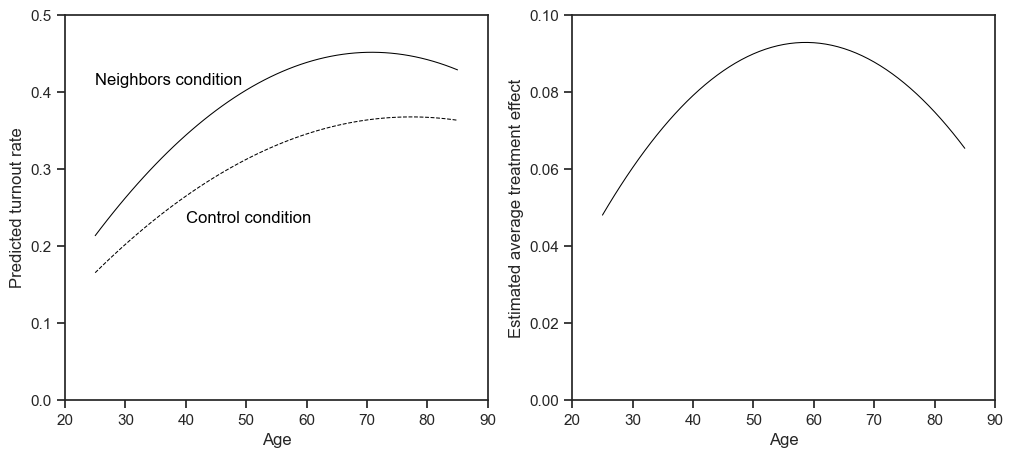

In [92]:
# create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plotting the predicted turnout rate under each condition
sns.lineplot(
    x=np.arange(25, 86), y=yT_hat, color='black', linewidth=0.75, ax=axs[0]
).set(xlabel='Age', ylabel='Predicted turnout rate', 
      xlim=(20, 90), ylim=(0, 0.5))

sns.lineplot(
    x=np.arange(25, 86), y=yC_hat, color='black', linewidth=0.75, 
    linestyle='--', ax=axs[0]
)

# add text labels
axs[0].text(x=25, y=0.41, s='Neighbors condition', color='black')
axs[0].text(x=40, y=0.23, s='Control condition', color='black')

# plotting the average treatment effect as a function of age
sns.lineplot(
    x=np.arange(25, 86), y=ate_age2, color='black', linewidth=0.75, ax=axs[1]
).set(xlabel='Age', ylabel='Estimated average treatment effect', 
      xlim=(20, 90), ylim=(0, 0.1))

### Section 4.3.4: Regression Discontinuity Design {-}

**In Progress**

## Appendix: statsmodels considerations {-}

This appendix addresses a few nuances to consider when using the `statsmodels` module. 

### Section A.1: Interaction with patsy module {-}

### Section A.2: Variable names {-}

### Section A.3: Object oriented programming (OOP) workflow {-}

**In Progress** 